<h1>Импорт библиотек

In [3]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [4]:
def sum_prod(X, V):
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    p = len(X)
    result = np.zeros_like(V[0])
    
    for i in range(p):
        result += np.dot(X[i], V[i])
    
    return result

X = [np.array([[5, 6], [7, 8]]), np.array([[8, 6], [7, 5]])]
V = [np.array([[6], [6]]), np.array([[4], [3]])]

print(sum_prod(X,V))

[[116]
 [133]]


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [7]:
def binarize(M, threshold=0.5):

    binary_matrix = np.where(M > threshold, 1, 0)
    return binary_matrix
print(binarize(np.array([[2,4,6],[7,0.6,0.9],[7,6,13]])))

[[1 1 1]
 [1 1 1]
 [1 1 1]]


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [8]:
def unique_rows(mat):
    # Your code goes here
    rows = []
    for row in mat:
        rows.append(np.unique(row))
    return rows

def unique_columns(mat):
    # Your code goes here
    columns = []
    for col in mat.T:
        columns.append(np.unique(col))
    return columns

print(unique_rows(np.array([[2,2,4],[4,2,4],[5,3,5]])))
print(unique_columns(np.array([[1,2,1],[1,5,1],[1,8,1]])))

[array([2, 4]), array([2, 4]), array([3, 5])]
[array([1]), array([2, 5, 8]), array([1])]


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

Мат. ожидание для каждой строки: [ 0.11957488  0.16660228  0.06679691 -0.2580741   0.44167297  0.439073
  0.30120064 -0.5313121 ]
Дисперсия для каждой строки: [1.06569578 1.37477436 0.63483134 0.81994511 0.65683455 0.13440576
 0.70123892 1.07929301]
Мат. ожидание для каждого столбца: [ 0.05600685  0.22638161  0.03733386 -0.1207514   0.19969019  0.55811678
 -0.21098464 -0.20056689  0.29349993]
Дисперсия для каждого столбца: [1.19748311 0.49271668 1.05118175 0.8091236  0.58885547 0.87353551
 0.70535807 0.90303434 1.04473539]


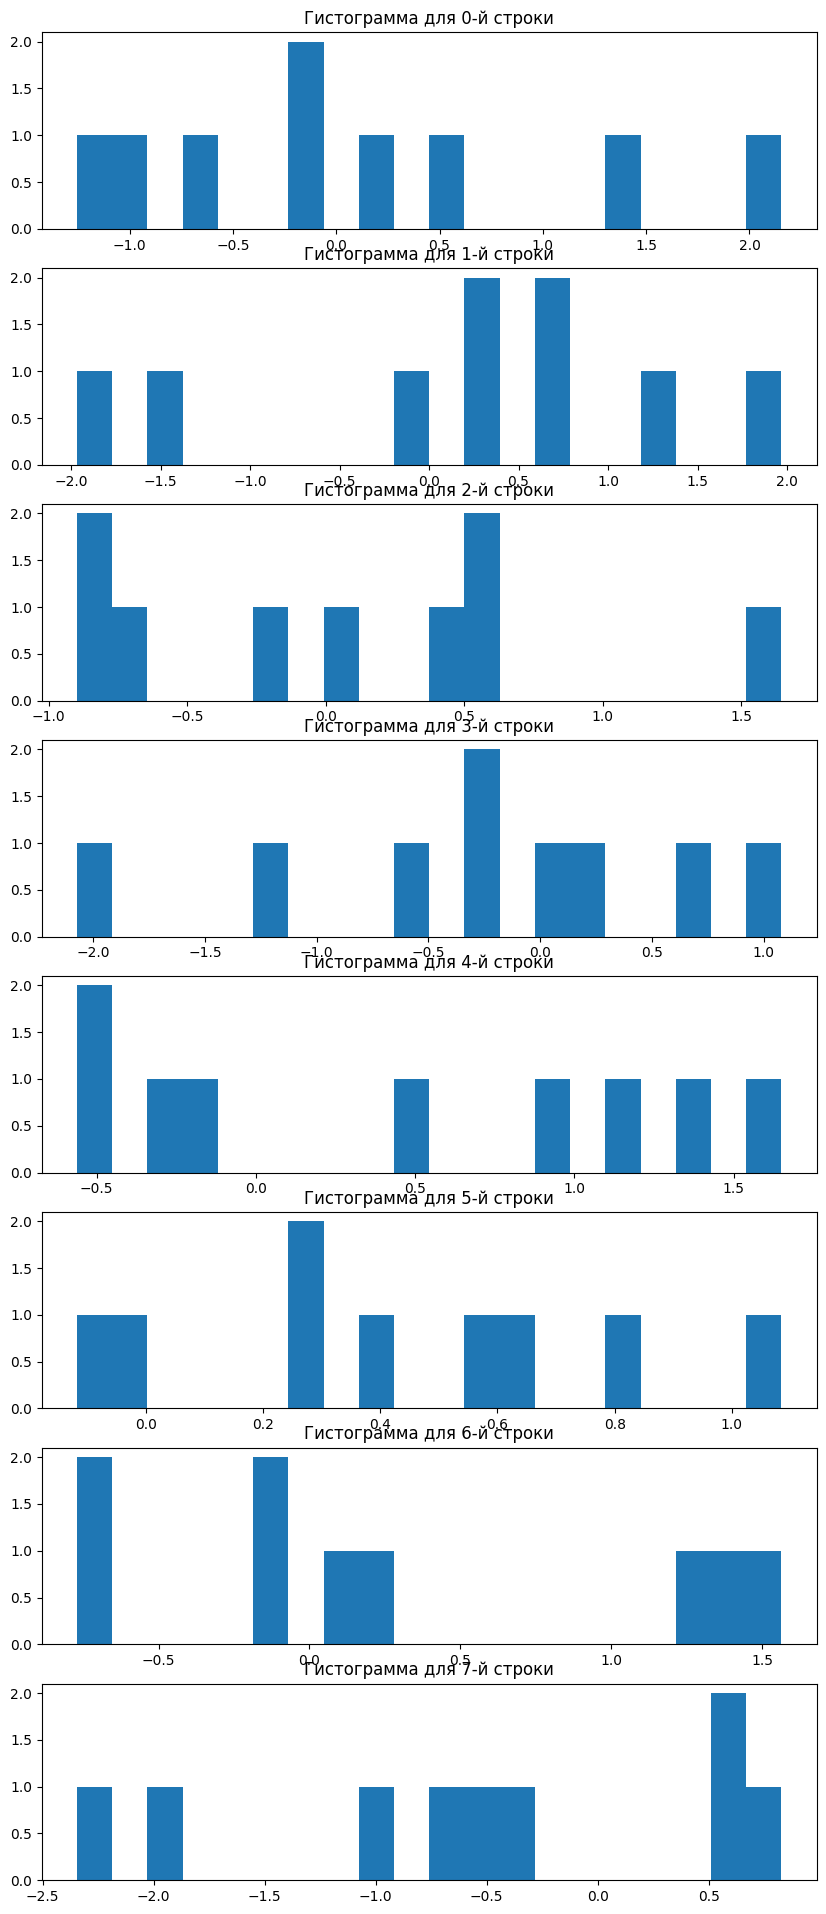

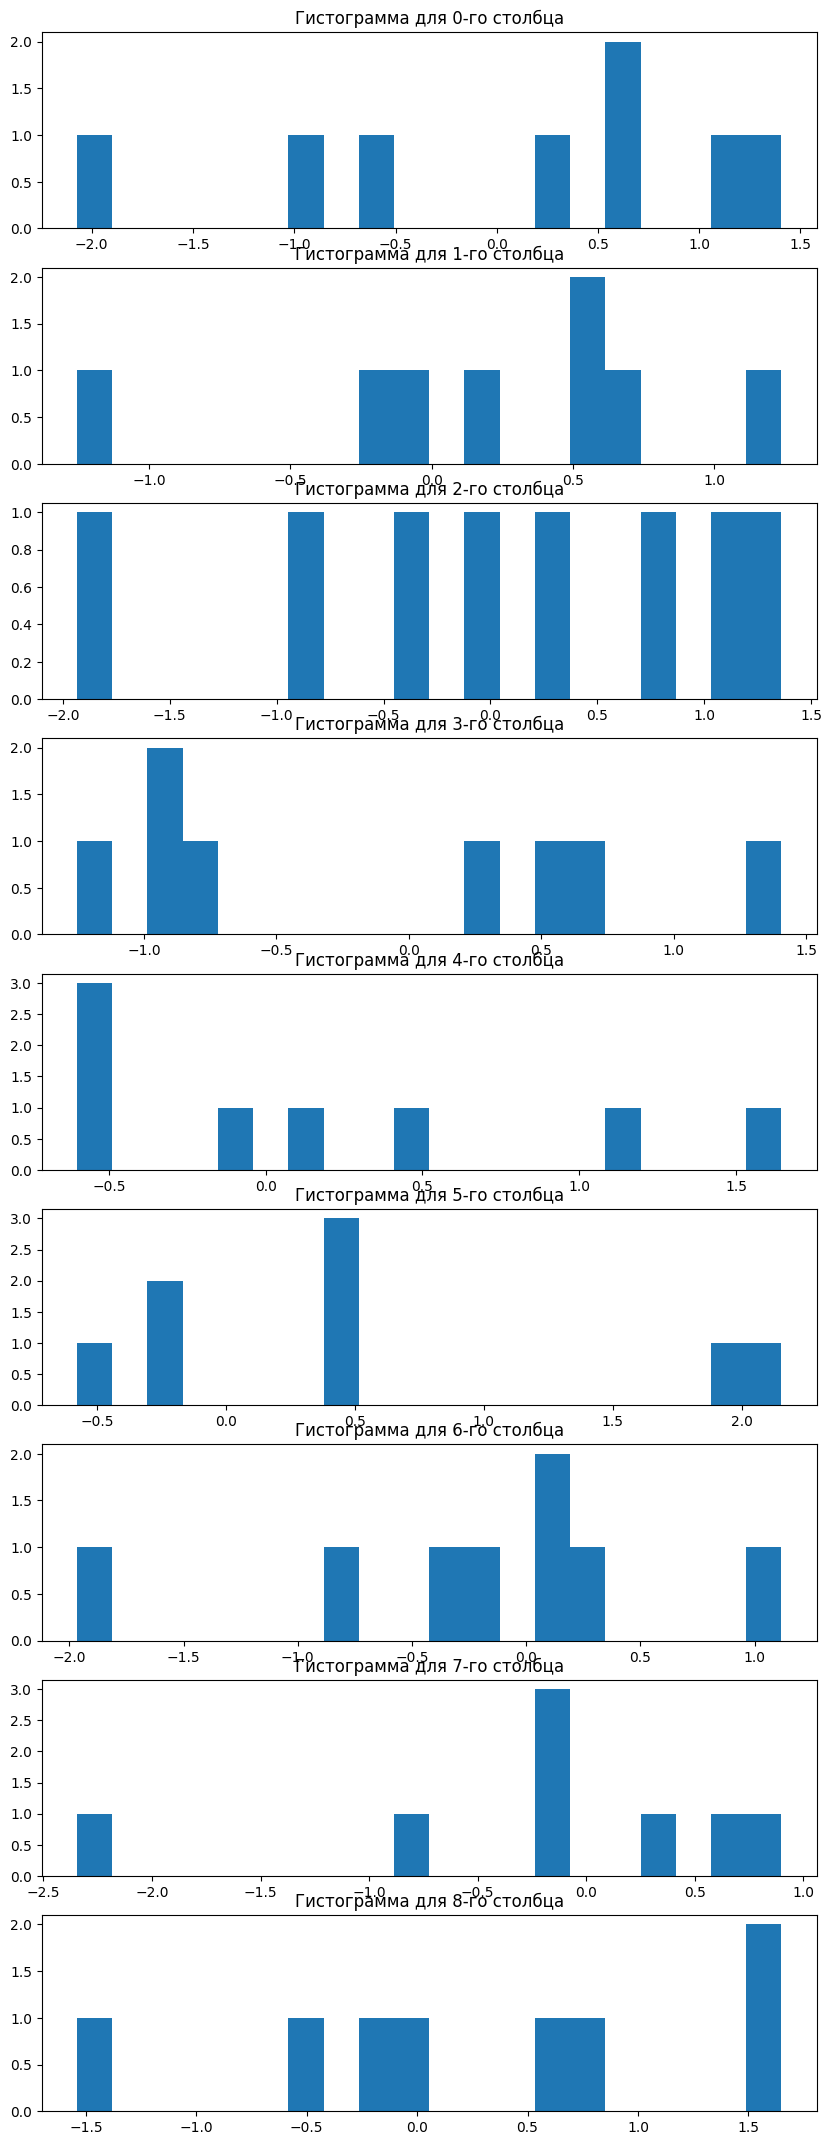

In [10]:
# Your code goes here
def fill_and_analyze_matrix(m, n, mu=0, sigma=1):
    matrix = np.random.normal(mu, sigma, size=(m, n))

    row_means = np.mean(matrix, axis=1)
    print("Мат. ожидание для каждой строки:", row_means)

    row_vars = np.var(matrix, axis=1)
    print("Дисперсия для каждой строки:", row_vars)

    col_means = np.mean(matrix, axis=0)
    print("Мат. ожидание для каждого столбца:", col_means)

    col_vars = np.var(matrix, axis=0)
    print("Дисперсия для каждого столбца:", col_vars)

    fig, axs = plt.subplots(m, 1, figsize=(10, m*3))
    for i in range(m):
        axs[i].hist(matrix[i, :], bins=20)
        axs[i].set_title(f"Гистограмма для {i}-й строки")

    fig, axs = plt.subplots(n, 1, figsize=(10, n*3))
    for j in range(n):
        axs[j].hist(matrix[:, j], bins=20)
        axs[j].set_title(f"Гистограмма для {j}-го столбца")

    plt.show()

fill_and_analyze_matrix(8, 9)

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [16]:
def chess(m, n, a, b):
    matrix = [[a if (i + j) % 2 == 0 else b for j in range(n)] for i in range(m)]
    return matrix

if __name__ == '__main__':

    mat_1 = chess(3, 3, 'a', 'b')
    expected_mat_1 = np.array([['a', 'b', 'a'], ['b', 'a', 'b'], ['a', 'b', 'a']])
    assert np.array_equal(mat_1, expected_mat_1), 'Верно'

    mat_2 = chess(3,3,1,0)
    expected_mat_2 = np.array([[1, 0, 1], [0, 1, 0], [1, 0, 1]])
    assert np.array_equal(mat_2, expected_mat_2), 'Ошибка'

<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

In [18]:
from PIL import Image, ImageDraw

def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    img = Image.new('RGB', (n, m), background_color)
    draw = ImageDraw.Draw(img)
    
    top_left = ((n - b) // 2, (m - a) // 2)
    bottom_right = ((n + b) // 2, (m + a) // 2)
    
    draw.rectangle([top_left, bottom_right], fill=rectangle_color)
    
    return img

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    img = Image.new('RGB', (n, m), background_color)
    draw = ImageDraw.Draw(img)
    
    top_left = ((n - b) // 2, (m - a) // 2)
    bottom_right = ((n + b) // 2, (m + a) // 2)
    
    draw.ellipse([top_left, bottom_right], fill=ellipse_color)
    
    return img

 # тест для прямоугольника
rectangle_image = draw_rectangle(100, 200, 100, 50, background_color=(255, 255, 255), rectangle_color=(255, 0, 0))
rectangle_image.show()

# тест для овала
ellipse_image = draw_ellipse(100, 200, 50, 30, background_color=(255, 255, 255), ellipse_color=(0, 255, 0))
ellipse_image.show() 


<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [19]:
# Your code goes here
def analyze(series, p):
    series = np.array(series)
    mean = np.mean(series)
    variance = np.var(series)
    std_dev = np.std(series)
    
    maxima = []
    minima = []
    for i in range(1, len(series)-1):
        if series[i] > series[i-1] and series[i] > series[i+1]:
            maxima.append(i)
        elif series[i] < series[i-1] and series[i] < series[i+1]:
            minima.append(i)
    
    moving_average = np.convolve(series, np.ones(p)/p, mode='valid')
    return mean, variance, std_dev, maxima, minima, moving_average

<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [21]:
# Your code goes here
def one_hot_encoding(labels):
    num_classes = max(labels) + 1
    
    encoded_labels = np.zeros((len(labels), num_classes), dtype=int)
    
    for i, label in enumerate(labels):
        encoded_labels[i][label] = 1
        
    return encoded_labels

labels = [0, 2, 3, 0]
encoded = one_hot_encoding(labels)
print(encoded)

[[1 0 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]]
